## Введение 

С целью проведения практичесского исследования и демонстрации работы методов классификации алгоритмов машинного обучения в данном проекте приведен анализ базы данных пациентов, которые страдают рассеянным склерозом. База данных состоит из 732 пациентов и содержит записи, которые собой представляют данные о медицинских показателях каждого пациента. Результирующей переменной в наборе данных является параметр "гпс", который говорит о том, будут ли у пациента ухудшения после проведения терапии. В рамках машиннго обучения данная задача является **бинарной задачей классификации**, где требуется построить алгоритм, способный классифицировать произвольный объект множества  

Данный проект содержит следующие разделы: 
- описание и подготовка базы данных для последующей её предобработки и обучения классификатора;
- разделение базы данных на две выборки - обучающую и тестовую;
- обучение различных моделей классификации на обучающем наборе данных;
- тестирование классификатора на тестовом наборе данных и расчет метрик и показателей качества в сравнении в реальными результатам
- выводы

В целом, в последние годы в медицине все чаще и эффективнее используются методы машинного обучения, так как данный технологический сектор особенно востребован в вопросах установления диагнозов пациентов, расчета оптимальных доз препаратов, предсказания процесса течения заболеваний и прочих вопросах. Таким образом, настоящий проект имеет практическое значение и может быть использован в качестве основы для медицинских целей. 

### Описание и подготовка базы данных для последующей её предобработки и обучения классификатора

Для начала работы требуется загрузка основных библиотек для работы с данными. Среди основных библиотек выгружена библиотека Scikit-Learn, которая упрощает процесс создания, обучения, тестирования и измерения классификатора 

In [240]:
import pandas as pd
import numpy as np

import sklearn.model_selection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
from imblearn.under_sampling import NearMiss

from scipy import stats

from matplotlib import pyplot
import seaborn as sns

Выгрузка базы данных пациентов производится в формате .csv с выводом первых пяти строк базы, включая шапку таблицы, для предварительнго просмотра. Данные сохранены в переменную df

In [220]:
df = pd.read_csv("project_bu.csv")
df.head()

,гпс+,гпс,пол,Препарат,препарат до,Активность до,EDSS на,обострдо,Инъектор,Время,...,"ларингит, трахеит",ИМочП,пиелрнфрит,Герпес,Афты,Изм веса,тонзиллит,пиелонефрит,Тревога,Депрессия
0,13,1,0,31,3.0,"0,86","1,0",2,0,20,...,0,0,0,0,0,0,0,0,29,36
1,21,1,0,32,3.0,"0,16","3,5",3,0,20,...,0,1,1,1,0,-1,0,0,29,48
2,10,1,1,31,3.0,"1,24","1,5",3,0,20,...,0,0,0,0,0,2,0,0,35,49
3,17,1,0,4,3.0,"0,60","5,0",6,0,16,...,0,1,0,2,1,0,1,0,27,52
4,4,0,0,21,0.0,"0,10","1,0",1,0,20,...,0,1,0,2,0,0,1,0,26,51


Для более детального рассмотрения имеющихся данных и проведения анализа необходимости какой-либо дальнейшей предобработки, необходимо воспользоваться некоторыми методами и функциями библиотеки Pandas, а именно:
- метод *.shape* показывает имеющееся количество строк и столбцов в наборе данных;
- функция *.info()* показывает такие детали как наименования столбцов, количсетво ненулевых строк в каждом столбце, типы данных, общий размер и проч. 

In [221]:
print ("Размер исходного набора данных: ", df.shape)

Размер исходного набора данных:  (732, 21)


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   гпс+               732 non-null    int64  
 1   гпс                732 non-null    int64  
 2   пол                732 non-null    int64  
 3   Препарат           732 non-null    int64  
 4   препарат до        731 non-null    float64
 5   Активность до      732 non-null    object 
 6   EDSS на            732 non-null    object 
 7   обострдо           732 non-null    int64  
 8   Инъектор           732 non-null    int64  
 9   Время              732 non-null    int64  
 10  ИДыхП              732 non-null    int64  
 11  ларингит, трахеит  732 non-null    int64  
 12  ИМочП              732 non-null    int64  
 13  пиелрнфрит         732 non-null    int64  
 14  Герпес             732 non-null    int64  
 15  Афты               732 non-null    int64  
 16  Изм веса           732 non

Исходя из информации, полученной выше, возможно сделать первые выводы о структуре и объеме данных, среди которых:
- база данных имеет размер из 731 строк (количество пациентов) и 21 столбцов (медицинские показания);
- большинство показателй имеют цифровые дробные и целые значения (float, integer), но при этом в наборе данных имеются показатели с типом данных object. Этот факт необходимо учитывать и откорректировать до начала обучения модели классификатора, так как модели машинного обучения работают только с цифровыми значениями;
- в таблице невооруженным взглядом видно, что некоторые столбцы содержат дробные значения, разделенные запятой, это означает, что такие запятые нужно заменить на точки для возможности дальнейших математичсеких манипуляций с данными в таблице;
- большинство показателй не имеют нулевых пропущенных значений, за исключением одного, который также нужно будет откорректировать в ходе подготовки к обучению модели. 

Как указано выше, требуется замена запятых на точки и изменение типа некоторых показателей на цифровой:

In [223]:
# замена запятых на точки
df['Активность до'] = [x.replace(',', '.') for x in df['Активность до']]
df['EDSS на'] = [x.replace(',', '.') for x in df['EDSS на']]

# изменение типа данных на цифровой 
df['Активность до'] = df['Активность до'].astype(float)
df['EDSS на'] = df['EDSS на'].astype(float)

### Разделение базы данных на две выборки: обучающую и тестовую

При построении предсказательных моделей в машинном обучении исходный набор данных должен быть разделен на обучающий (train) и тестовый (test) набор. Обучающий набор данных должен быть использован для обучения предсказательной модели, при этом тестовая выборка нужна для оценки прогнозных свойств модели на новых данных, т.е. данных, которые не использовались для обучения модели. 

Обучающая и тестовые выборки установлены с пропорцией 50-50% от первоначального объема данных 

Указанные выборки сохранены в переменные df_train, df_test

In [224]:
# разделение базы данных на две выборки: обучающую и тестовую
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3)

# вывод результатов с объемом выборок 
print("Размер обучающей выборки:", df_train.shape)
print("Размер тестовой выборки:", df_test.shape)

Размер обучающей выборки: (512, 21)
Размер тестовой выборки: (220, 21)


Как было отмечено ранее, в исходном наборе данных имеются точечные пропуски данных, поэтому для дальнейшей работоспособности предсказательной модели нужно удалить строки с такими пропусками: 

In [225]:
# удаление пропусков в обучающем и тестовых наборах 
df_train = df_train.dropna()
df_test = df_test.dropna()

# вывод результатов с объемом очищенных выборок 
print("Размер обучающей выборки после очистки:", df_train.shape)
print("Размер тестовой выборки после очистки:", df_test.shape)

Размер обучающей выборки после очистки: (511, 21)
Размер тестовой выборки после очистки: (220, 21)


### Обучение различных моделей классификации на обучающем наборе данных

Первым шагом до начала обучения моделей классификации необходимо разделить обучающий и тестовый наборы данных на зависимую переменную (X) и результирующую переменную (Y), также при выделении переменных необходимо удалить столбец "гпс+", так как он целевая переменная построена на его основе: 

In [8]:
# выделение результирующей переменной (столбец "гпс") в отдельную выборку и удаление данного столбца из оставшейся выборки  
x_train = df_train.drop(["гпс", "гпс+"], axis=1)
y_train = df_train["гпс"]

x_test = df_test.drop(["гпс", "гпс+"], axis=1)
y_test = df_test["гпс"]

# вывод результатов с объемом выборок 
print("Размер обучающей выборки с зависимой переменной: ", x_train.shape)
print("Размер обучающей выборки с результирующей переменной: ", y_train.shape)

print("Размер тестовой выборки с зависимой переменной: ", x_test.shape)
print("Размер тестовой выборки с результирующей переменной: ", y_test.shape)

Размер обучающей выборки с зависимой переменной:  (512, 19)
Размер обучающей выборки с результирующей переменной:  (512,)
Размер тестовой выборки с зависимой переменной:  (219, 19)
Размер тестовой выборки с результирующей переменной:  (219,)


Учитывая тот факт, что имеющийся набор данных содержит коллекцию размеченных образцов, в данном проекте целесообразнее всего применить алгоритмы машинного обучения, относящиеся к типу машинного обучения "с учителем". Цель алгоритма машинного обучения с учителем состоит в том чтобы на основе набора данных создать модель, которая принимает вектор признаков Х на входе и возвращает информаацию, которая позволяет определить метку для этого вектора признака, как это описано в книге Андрея Буркова "Машинное обучение без лишних слов", 2020

Другими словами, чтобы алгоритм относился к обучению с учителем, он должен работать с выборками, которые содержат в себе не только вектор независимых переменных (Х), но и результирующее (целевое) значение (Y). Разница между результирующим и фактическим результатом модели называется ошибкой обучения, которая минимизируется в процессе обучения модели и выступает в качестве «учителя». Значение выходной ошибки будет использовано для расчета показателей качества модели. 

В настоящем проекте основной целью является построение предстказательной модели классификации. В настоящее время уже разработаны алгоритмы обучения с учителем, каждый из которых имеет плюсы и минусы. Не существует единого универсального алгоритма машинного обучения, который бы подходил для всех задач анализа.

К числу алгоритмов обучения с учителем для решения задач классификации относятся:

1. деревья решений;
2. метод опорных векторов (SVM);
3. байесовский классификатор;
4. линейный дискриминантный анализ;
5. метод k-ближайших соседей;
6. рандомный лес

Все перечисленные выше алгоритмы будут обучены в данном проекте для сравнения и выявления наилучшего с наиболее оптимальными параметрами качества.  

Loginom. Обучение с учителем (Supervised learning): https://wiki.loginom.ru/articles/supervised-learning.html

Далее в проекте будут последовательно обучены вышеописанные модели для решения задачи классификации с расчетом точности каждой модели (accuracy) для последующего выбора наилучшей модели в следующей последовательности действий:
- обучение модели классификации на обучающем наборе данных;
- тестирование классификатора на тестовом наборе данных, расчет метрик и показателей качества в сравнении в реальными результатам
- выбор наиболее оптимальной модели

### 1. Деревья решений

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества. В простейшем случае, в результате проверки, множество примеров, попавших в узел, разбивается на два подмножества, в одно из которых попадают примеры, удовлетворяющие правилу, а в другое — не удовлетворяющие.

Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.

Loginom. Деревья решений — один из методов автоматического анализа данных. Разбираем общие принципы работы и области применения:  https://loginom.ru/blog/decision-tree

In [9]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

### 2. Метод опорных векторов (SVM)

Метод опорных векторов (англ. support vector machine, SVM) — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Университет ИТМО. Метод опорных векторов (SVM): https://neerc.ifmo.ru/wiki/index.php

In [10]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

### 3. Байесовский классификатор

Байесовский классификатор — широкий класс алгоритмов классификации, основанный на принципе максимума апостериорной вероятности. Для классифицируемого объекта вычисляются функции правдоподобия каждого из классов, по ним вычисляются апостериорные вероятности классов. Объект относится к тому классу, для которого апостериорная вероятность максимальна.

Распознование. Байесовский классификатор: http://www.machinelearning.ru/wiki/index.php

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### 4. Линейный дискриминантный анализ

Линейный дискриминантный анализ (ЛДА), а также связанный с ним линейный дискриминант Фишера — методы статистики и машинного обучения, применяемые для нахождения линейных комбинаций признаков, наилучшим образом разделяющих два или более класса объектов или событий. Полученная комбинация может быть использована в качестве линейного классификатора или для сокращения размерности пространства признаков перед последующей классификацией.

Распознование. Линейный дискриминантный анализ: http://www.machinelearning.ru/wiki/index.php

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

### 5. Метод k-ближайших соседей

Метод k-ближайших соседей используется для решения задачи классификации. Он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков. Это один из простейших алгоритмов обучения классификационных моделей.

Loginom. Метод k-ближайших соседей (K-nearest neighbor): https://wiki.loginom.ru/articles/k-nearest-neighbor.html

In [13]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

### 6. Рандомный лес

Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается.

Proglib. Машинное обучение для начинающих: алгоритм случайного леса (Random Forest): https://proglib.io/p/mashinnoe-obuchenie-dlya-nachinayushchih-algoritm-sluchaynogo-lesa-random-forest-2021-08-12

In [14]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

### Тестирование классификатора на тестовом наборе данных и расчет метрик и показателей качества в сравнении в реальными результатам

Следующим шагом будет проведено тестирование каждого из полученных классификаторов на тестовом наборе данных (x_test):

In [15]:
# 1. Деревья решений
y_pred_test_DT = decision_tree.predict(x_test)

# 2. Метод опорных векторов (SVM)
y_pred_test_svm = svm_model.predict(x_test)

# 3. Байесовский классификатор
y_pred_test_GNB = gnb.predict(x_test)

# 4. Линейный дискриминантный анализ
y_pred_test_lda = lda.predict(x_test)

# 5. Метод k-ближайших соседей
y_pred_test_knn = knn.predict(x_test)

# 6. Рандомный лес
y_pred_test_RF = forest.predict(x_test)

Для получения первичной метрики качества моделей, необходимо сравнить получившиеся результаты предсказаний (y_pred_test) с реальными данными из исходного набора данных (y_test) и рассчитать точность каждой модели (accuracy). Для удобства сранения, информация приведена в нижеследующем виде:

In [16]:
print ("1.Деревья решений:                ", accuracy_score(y_test, y_pred_test_DT))
print ("2.Метод опорных векторов (SVM):    ", accuracy_score(y_test, y_pred_test_svm))
print ("3.Байесовский классификатор:        ", accuracy_score(y_test, y_pred_test_GNB))
print ("4.Линейный дискриминантный анализ:  ", accuracy_score(y_test, y_pred_test_lda))
print ("5.Метод k-ближайших соседей:       ", accuracy_score(y_test, y_pred_test_knn))
print ("6.Рандомный лес:                  ", accuracy_score(y_test, y_pred_test_RF))

1.Деревья решений:                 0.7077625570776256
2.Метод опорных векторов (SVM):     0.6255707762557078
3.Байесовский классификатор:         0.6575342465753424
4.Линейный дискриминантный анализ:   0.639269406392694
5.Метод k-ближайших соседей:        0.6757990867579908
6.Рандомный лес:                   0.7077625570776256


На основании полученных данных можно сделать вывод о том, что в рамках данного проекта наиболее оптимальные результаты показала модель "Рандомный лес", точность модели составила более 70%. 

На следующем шаге необходмо рассмотреть метрики с показателями качества модели в комплексе. Для этого можно воспользоваться функцией classification_report() для алгоритма "Рандомный лес" и матрицу ошибок confusion_matrix

In [17]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       127
           1       0.68      0.57      0.62        92

    accuracy                           0.71       219
   macro avg       0.70      0.69      0.69       219
weighted avg       0.71      0.71      0.70       219



*Precision* показывает долю объектов, названных классификатором положительными и при этом действительно являющимися таковыми 

*Recall* показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм

In [18]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred_test_RF)
print (cm)

[[103  24]
 [ 40  52]]


Матрица ошибок показывает, что количество ложноположительных (44) и ложноотрицаильных (19) предсказаний гораздо меньше, чем корректно предсказанных случаев (99 + 60)

### Анализ важности признаков

Рассмотренные выше алгоритмы в ходе расчета предсказаний формируют набор коэффициентов для использования во взвешенной сумме. Эти коэффициенты можно использовать непосредственно в качестве оценки важности признаков. Произведем оценку важности признаков в модели "Рандомный лес", которая показала наиболее оптимальный результат. 

Text(0.5, 0, 'Random Forest Feature Importance')

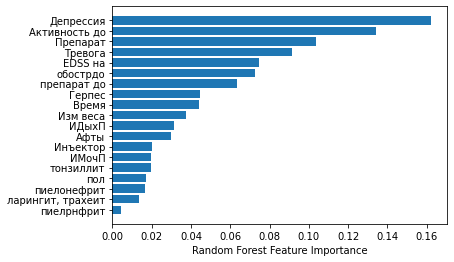

In [19]:
sorted_idx = forest.feature_importances_.argsort()
pyplot.barh(x_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

Выполнение примера соответствует модели, а затем сообщает значение коэффициента для каждой функции. Результаты предполагают, что, несколько функций важны для предсказания, наиболее существенные, как это видно в диаграмме, это:

- Депрессия
- Активность до
- Препарат
- Тревога

У прочих параметров, согласно информации на полученной диаграмме, уровень существенности признаков для модели гораздо ниже. Важно отметить, что даже у параметра, имеющего наибольшую важность для модели, коэфициент связи не достаточно высок для того, чтобы итоговая модель имела достаточно высокий уровень точности (менее 0.2%). 

Для дальнешего увеличения производительности полученной модели, которая показала наилучший результат в базовом виде, потребуется анализ с точки зрения необходимости очистки исхоных данных и препроцессинга признаков, которые рассмотрены далее в проекте 

## Чистка данных 

Для улучшения производительности любой модели как для решения задач классификации, так и для задач регрессии, требуется предварительная обработка и очистка исходных данных в наборе. Очистка данных – это процесс обнаружения и исправления (или удаления) поврежденных или неточных записей из набора записей, таблицы или базы данных. Процесс включает в себя выявление неполных, неправильных, неточных или несущественных данных, а затем замену, изменение или удаление «загрязненных» данных. Одной из важных проблем, которую помогает решить очистка данных является замена, восстановление или удаление пустых или неифрмативных данных.  

Рассмотрим имеющийся исходный набор данных с точки зрения наличия пропусков в нем. Учитывая, что признаков в наборе не очень много, можно визуализировать пропущенные значения с помощью тепловой карты

<AxesSubplot:>

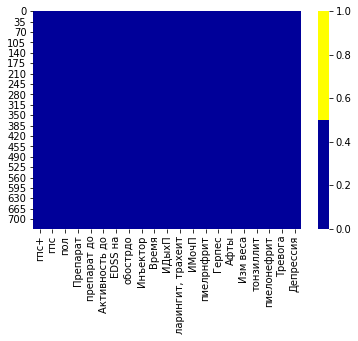

In [20]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Тепловая карта наглядно показывает, что в исходном наборе данных нет каких-либо существенных пропусков и явных пробелов. 

Методы заполнения пробелов можно применять и для редактирования таблиц данных. Пусть таблица не содержит пробелов, но возникает вопрос о том, нет ли в ней грубых случайных или умышленных ошибок. Для ответа на
этот вопрос нужно обнаружить закономерные связи между данными таблицы и проверить, согласуется ли каждый конкретный элемент таблицы с этими закономерностями.

Проверка состоит в следующем. Используя обнаруженные закономерности, предсказываются значения элементов таблицы и сравниваются прогнозы с фактическими значениями.

Н. Г. Загоруйко, В. В. Татарников. ОБНАРУЖЕНИЕ ОШИБОК И ЗАПОЛНЕНИЕ
ПРОБЕЛОВ В КУБАХ ДАННЫХ. Сибирский журнал индустриальной математики Апрель–июнь, 2014. Том XVII, № 2(58)

In [226]:
def drop_numerical_outliers(df, z_thresh=4):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df_train)
print ("Размер обучающего набора после очистки: ", df_train.shape)

drop_numerical_outliers(df_test)
print ("Размер тестового набора после очистки: ", df_test.shape)

Размер обучающего набора после очистки:  (465, 21)
Размер тестового набора после очистки:  (194, 21)


После очистки данных от показателей, являющихся отклонением от имеющихся закономерностей, пересохраним переменные с обновленным объемом в тестовых и тренировочных наборах данных

In [227]:
# выделение результирующей переменной (столбец "гпс") в отдельную выборку и удаление данного столбца из оставшейся выборки  
x_train = df_train.drop(["гпс", "гпс+"], axis=1)
y_train = df_train["гпс"]

x_test = df_test.drop(["гпс", "гпс+"], axis=1)
y_test = df_test["гпс"]

# вывод результатов с объемом выборок 
print("Размер обучающей выборки с зависимой переменной: ", x_train.shape)
print("Размер обучающей выборки с результирующей переменной: ", y_train.shape)

print("Размер тестовой выборки с зависимой переменной: ", x_test.shape)
print("Размер тестовой выборки с результирующей переменной: ", y_test.shape)

Размер обучающей выборки с зависимой переменной:  (465, 19)
Размер обучающей выборки с результирующей переменной:  (465,)
Размер тестовой выборки с зависимой переменной:  (194, 19)
Размер тестовой выборки с результирующей переменной:  (194,)


На данном этапе очистка данных от показателей, являющихся отклонением от имеющихся закономерностей, завершена

## Предварительная обработка данных

Для улучшения продуктивности модели важно, чтобы данные были преобразованы в понятный формат, прежде чем их можно будет обрабатывать. Обработка данных предполагает изменение или отображение формата данных, чтобы преобразовать его из формата необработанных данных в формат, более подходящий для последующего анализа данных.

### Стандартизация

Стандартизацию можно рассматривать как процесс внедрения или разработки стандартов на основе консенсуса. Эти стандарты помогают максимизировать совместимость, воспроизводимость и качество, среди прочего. Когда дело доходит до машинного обучения, стандартизация служит средством сделать метрику данных одинаковой во всех данных. Этот метод можно применять к различным типам данных, таким как значения пикселей для изображений или, в частности, для медицинских данных. Многие алгоритмы машинного обучения, такие как метод опорных векторов и метод k-ближайшего соседа, используют метод стандартизации для изменения масштаба данных.

itchef.ru. Предварительная обработка данных для машинного обучения. https://itchef.ru/articles/327494/

In [228]:
# Построение модели стандартизации
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)

# Масштабирование признаков в обучающем наборе данных 
x_train_standardized = scaler.transform(x_train)

# Масштабирование признаков в тестовом наборе данных 
x_test_standardized = scaler.transform(x_test)

# Вывод итогового объема 
print("x_train_standardized:", x_train_standardized.shape)
print("x_test_standardized:", x_test_standardized.shape)

x_train_standardized: (465, 19)
x_test_standardized: (194, 19)


### Уменьшение размерности - метод главных компонент

Уменьшение размерности включает в себя выбор или извлечение наиболее важных компонентов (признаков) многомерного набора данных. Scikit-learn предлагает несколько подходов к уменьшению размерности. Одним из них является анализ основных компонентов (PCA).

DataStart. Что такое Scikit Learn - гайд по популярной библиотеке Python для начинающих. https://datastart.ru/blog/read/chto-takoe-scikit-learn-gayd-po-populyarnoy-biblioteke-python-dlya-nachinayuschih

In [229]:
# Построение модели PCA и снижение набора до 10 наиболее важных признаков 
pca = sklearn.decomposition.PCA(n_components=10)
pca.fit(x_train)

# Снижение количества признаков в обучающем наборе данных 
x_train_reduced = pca.transform(x_train)

# Снижение количества признаков в тестовом наборе данных 
x_test_reduced = pca.transform(x_test)

# Вывод итогового объема 
print("x_train_reduced:", x_train_reduced.shape)
print("x_test_reduced:", x_test_reduced.shape)

x_train_reduced: (465, 10)
x_test_reduced: (194, 10)


В результате проведенного метода уменьшения размерности, набор данных сокращен до 10 наиболее информативных признаков 

### Удаление примеров мажоритарного класса - Undersampling

На данном этапе необходимо провести проверку наличия несбалансированного класса в целевой переменной "гпс"

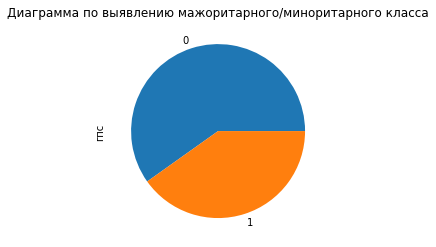

In [239]:
df1 = df.groupby('гпс').size()

df1.plot(kind='pie', figsize=(4, 4))
pyplot.title("Диаграмма по выявлению мажоритарного/миноритарного класса")
pyplot.ylabel("гпс")
pyplot.show()

Тенденция несбалансированности хорошо просматривается на полученной диаграмме. Класс "гпс" равный 0 преобладает над классом, равным 1. Одним из подходов для решения указанной проблемы является применение различных стратегий сэмплинга. Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling). В настоящем примере применим классические стратегии удаления примеров мажоритарного класса из набора данных

In [230]:
# Построение модели undersampling
nr = NearMiss()

# Применение в обучающем и тестовом наборах данных 
x_train_balanced, y_train_balanced = nr.fit_resample(x_train_reduced, y_train.ravel())

# вывод результатов после применния undersampling
print('After Undersampling, the shape of train_X: {}'.format(x_train_balanced.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_balanced.shape))

# вывод результатов после применния undersampling в разрезе классов 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_balanced == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_balanced == 0)))

After Undersampling, the shape of train_X: (364, 10)
After Undersampling, the shape of train_y: (364,) 

After Undersampling, counts of label '1': 182
After Undersampling, counts of label '0': 182


В приведенных результатах видно, что количество показателей в обоих классах сбалансировалось, теперь оба класса равны. 

## Повторное обучение различных моделей классификации после чистки и предобработки данных 

После проведенных процедур по улучшению качества данных необходимо повторно построить модель классификации, чтобы рассмотреть разницу в качестве и производительности. Были произведены следующие улучшения, а именно:
- чистка данных
- стандартизация
- уменьшение размерности - метод главных компонент
- удаление примеров мажоритарного класса - Undersampling

В данном примере повторно построим модель "Рандомный лес", которая показала наилучший результат на исходных данных и еще на двух моделях классисикации для сравнения ("Дерево решений", "Метод k-ближайших соседей")

In [231]:
# Дерево решений
decision_tree_feature = DecisionTreeClassifier()
decision_tree_feature.fit(x_train_balanced, y_train_balanced)


# Метод k-ближайших соседей
knn_feature = KNeighborsClassifier()
knn_feature.fit(x_train_balanced, y_train_balanced)


# Рандомный лес
forest_feature = RandomForestClassifier()
forest_feature.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier()

In [233]:
# Деревья решений 
y_pred_test_DT_feature = decision_tree_feature.predict(x_test_reduced)


# Метод k-ближайших соседей 
y_pred_test_knn_feature = knn_feature.predict(x_test_reduced)


# Рандомный лес- одномерн
y_pred_test_RF_feature = forest_feature.predict(x_test_reduced)

print ("После обработки:  \n")
print ("1.1. Деревья решений_feature:                ", accuracy_score(y_test, y_pred_test_DT_feature))
# print ("1.2. Деревья решений_PCA:                    ", accuracy_score(y_test, y_pred_test_DT_PCA), "\n")

print ("2.1.Метод k-ближайших соседей_feature:        ", accuracy_score(y_test, y_pred_test_knn_feature))
# print ("2.2.Метод k-ближайших соседей_PCA:            ", accuracy_score(y_test, y_pred_test_knn_PCA), "\n")

print ("3.1. Рандомный лес_Feature:                  ", accuracy_score(y_test, y_pred_test_RF_feature))
# print ("3.2. Рандомный лес_PCA:                      ", accuracy_score(y_test, y_pred_test_RF_PCA))

После обработки:  

1.1. Деревья решений_feature:                 0.6804123711340206
2.1.Метод k-ближайших соседей_feature:         0.6958762886597938
3.1. Рандомный лес_Feature:                   0.7371134020618557


Итоговый результат показал, что точность модели "Рандомный лес", которая показала наилучший результат на исходных данных, улучшено и итоговая точность увеличена. Для сравнения также рассмотрим показатели по отчету классификации и матрицу ошибок, как и в первой части данного проекта. 

In [234]:
print(classification_report(y_test, y_pred_test_RF_feature))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       113
           1       0.65      0.80      0.72        81

    accuracy                           0.74       194
   macro avg       0.74      0.75      0.74       194
weighted avg       0.75      0.74      0.74       194



In [235]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred_test_RF_feature)
print (cm)

[[78 35]
 [16 65]]


В отчете классификации и матрице ошибок модели "Рандомный лес" также видны улучшения качества 

## Выводы

В рамках данного проекта была проведена работа по практичесскому исследованию и демонстрации работы методов классификации алгоритмов машинного обучения на основании базы данных пациентов, которые страдают рассеянным склерозом. С помощью алгоритмов машинного обучения выведен классификатор, предсказывающий будут ли у пациента ухудшения после проведения терапии. Из нескольких наиболее подходящих классификаторов, модель "Рандомный лес" показал наиболее точный результат предсказания. 

Вместе с тем, для улучшению производительности модели классификации были произведены некоторые манипуляции по чистке данных и их преобразованию. Были произведены следующие улучшения, а именно:

- чистка данных
- стандартизация
- уменьшение размерности - метод главных компонент
- удаление примеров мажоритарного класса - Undersampling

В результате произведенных изменений и манипуляций, производительность модели классисикации "Рандомный лес" улучшилась и повысилась точность. 

## Список литературы и ссылки

1. Бурков А: Машинное обучение без лишних слов. СПб.: Питер, 2020 (Серия "Библиотека программиста"), стр.18-19


2. Loginom. Обучение с учителем (Supervised learning) [Электронный ресурс] URL: https://wiki.loginom.ru/articles/supervised-learning.html (Дата обращения: 25.04.2022)


3. Loginom. Деревья решений — один из методов автоматического анализа данных. Разбираем общие принципы работы и области применения [Электронный ресурс] URL: https://loginom.ru/blog/decision-tree (Дата обращения: 25.04.2022)


4. Университет ИТМО. Метод опорных векторов (SVM) [Электронный ресурс] URL: https://neerc.ifmo.ru/wiki/index.php (Дата обращения: 25.04.2022)


5. Распознование. Байесовский классификатор [Электронный ресурс] URL: http://www.machinelearning.ru/wiki/index.php (Дата обращения: 25.04.2022)


6. Loginom. Метод k-ближайших соседей (K-nearest neighbor) [Электронный ресурс] URL: https://wiki.loginom.ru/articles/k-nearest-neighbor.html (Дата обращения: 25.04.2022)


7. Proglib. Машинное обучение для начинающих: алгоритм случайного леса (Random Forest) [Электронный ресурс] URL: https://proglib.io/p/mashinnoe-obuchenie-dlya-nachinayushchih-algoritm-sluchaynogo-lesa-random-forest-2021-08-12 (Дата обращения: 26.04.2022)


8. Н. Г. Загоруйко, В. В. Татарников. ОБНАРУЖЕНИЕ ОШИБОК И ЗАПОЛНЕНИЕ ПРОБЕЛОВ В КУБАХ ДАННЫХ. Сибирский журнал индустриальной математики Апрель–июнь, 2014. Том XVII, № 2(58), стр.  50


9. itchef.ru. Предварительная обработка данных для машинного обучения. https://itchef.ru/articles/327494/ (дата обращения 18.05.2022)


10. DataStart. Что такое Scikit Learn - гайд по популярной библиотеке Python для начинающих. https://datastart.ru/blog/read/chto-takoe-scikit-learn-gayd-po-populyarnoy-biblioteke-python-dlya-nachinayuschih (дата обращения 18.05.2022)